# EDA

## Imports

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

## Read Data

In [9]:
classification = pd.read_csv("./data/classification_data.csv")
regression = pd.read_csv("./data/regression_data.csv")
prosecution = pd.read_csv("./data/prosecution_all_years.csv")

In [10]:
demo_classification = pd.read_csv("./demographics-data/classification_data_demographics.csv")
demo_regression = pd.read_csv("./demographics-data/regression_data_demographics.csv")
demo_prosecution = pd.read_csv("./demographics-data/prosecution_all_years_demographics.csv")

In [44]:
#function to move column to the end
def move_col(dataframe, column_name):
    return dataframe[[col for col in dataframe if col != column_name]+ [column_name]]

In [46]:
#move label/prosecution-rate to end 
demo_classification = move_col(demo_classification, 'labels')
demo_regression = move_col(demo_regression, 'prosecution-rate')

In [201]:
demo_classification.drop(columns='pct_Asian', inplace=True)
demo_regression.drop(columns='pct_Asian', inplace=True)

## Correlations

### Heatmaps

Text(0.5, 1.0, 'Regression Heatmap')

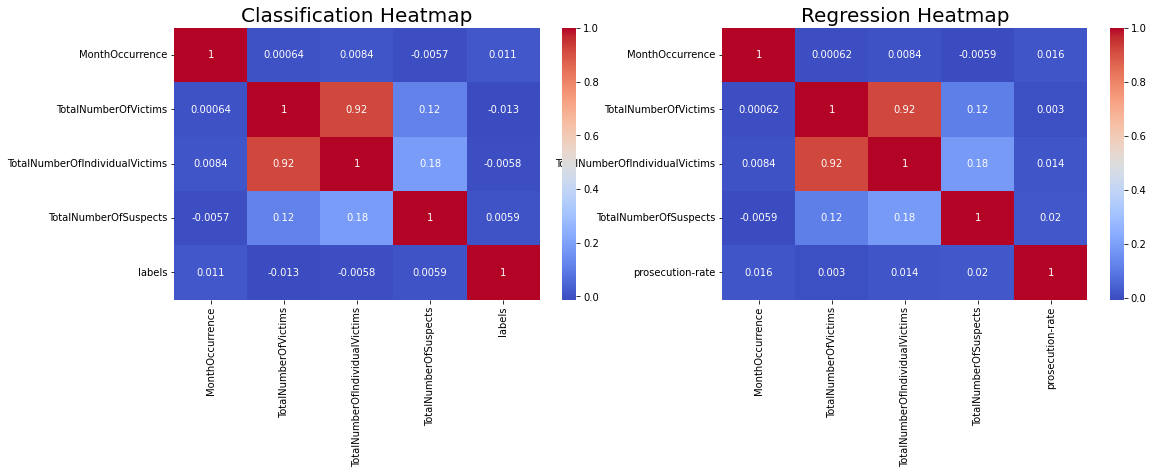

In [202]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18, 5))
sns.heatmap(classification.corr(), annot=True, cmap='coolwarm', ax=ax1)
ax1.set_title("Classification Heatmap", fontsize=20)

sns.heatmap(regression.corr(), annot=True, cmap='coolwarm', ax=ax2)
ax2.set_title("Regression Heatmap", fontsize=20)

Text(0.5, 1.0, 'Demographic Regression Heatmap')

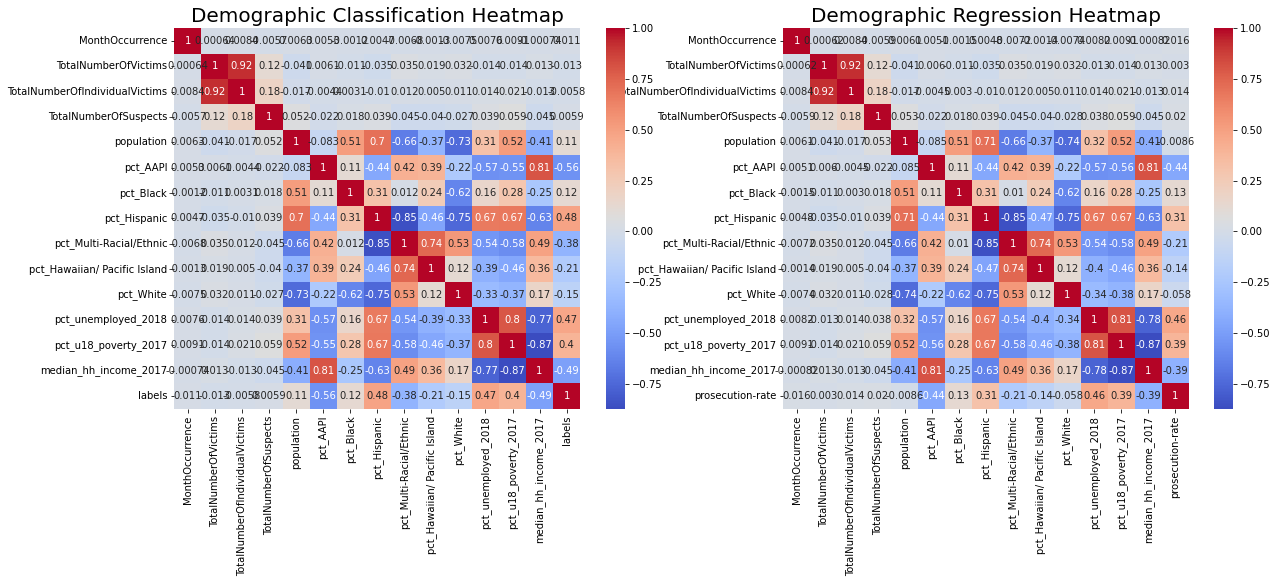

In [203]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 7))
sns.heatmap(demo_classification.corr(), annot=True, cmap='coolwarm', ax=ax1)
ax1.set_title("Demographic Classification Heatmap", fontsize=20)

sns.heatmap(demo_regression.corr(), annot=True, cmap='coolwarm', ax=ax2)
ax2.set_title("Demographic Regression Heatmap", fontsize=20)

### Turn Correlations into bar charts

In [204]:
#get label and prosecution-rate correlations
demo_labels_corr = demo_classification.corr()['labels'].sort_values(ascending=False)[1:]
demo_pros_rate_corr = demo_regression.corr()['prosecution-rate'].sort_values(ascending=False)[1:]

In [205]:
#function to make index names human readable
def rename_index(corr):
    new_index = {}
    for i in range(len(corr.index)):
        index = corr.index[i]
        index = index.replace("pct_", "% ")
        index = index.replace("_", " ")
        new_index[corr.index[i]] = index
    return corr.rename(new_index)

In [206]:
#find the 10 highest correlations
top_labels_corr = demo_labels_corr[np.abs(demo_labels_corr).sort_values(ascending=False)[:10].index].sort_values(ascending=False)
top_pros_rate_corr = demo_pros_rate_corr[np.abs(demo_pros_rate_corr).sort_values(ascending=False)[:10].index].sort_values(ascending=False)

#rename columns
top_labels_corr = rename_index(top_labels_corr)
top_pros_rate_corr = rename_index(top_pros_rate_corr)

In [210]:
top_corr_cols.shape

(11,)

In [211]:
#create palette
top_corr_cols = top_labels_corr.index.append(top_pros_rate_corr.index).drop_duplicates()
tcc_dict = {top_corr_cols[i] : sns.color_palette(n_colors=11)[i] for i in range(len(top_corr_cols))}

''

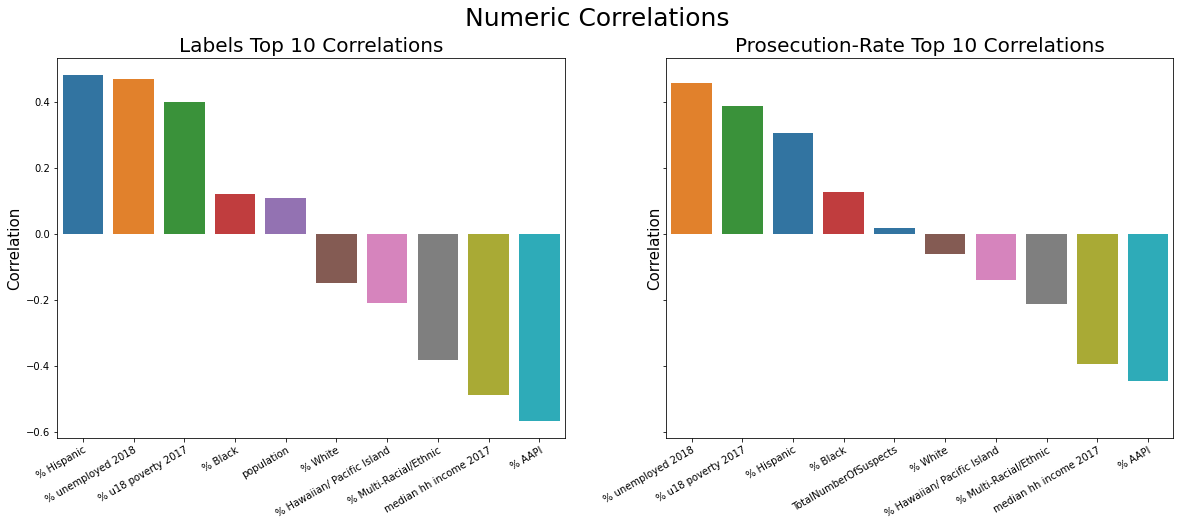

In [212]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(20, 7))
plt.suptitle("Numeric Correlations", fontsize=25)
sns.barplot(x=top_labels_corr.index, y=top_labels_corr, ax=ax1, palette=tcc_dict)
ax1.set_xticklabels(labels=top_labels_corr.index,rotation=30, ha='right', rotation_mode='anchor')
ax1.set_title("Labels Top 10 Correlations", fontsize=20)
ax1.set_ylabel("Correlation", fontsize=15)

sns.barplot(x=top_pros_rate_corr.index, y=top_pros_rate_corr, ax=ax2, palette=tcc_dict)
ax2.set_xticklabels(labels=top_pros_rate_corr.index,rotation=30, ha='right', rotation_mode='anchor')
ax2.set_title("Prosecution-Rate Top 10 Correlations", fontsize=20)
ax2.set_ylabel("Correlation", fontsize=15)

;

## Look at Chi2 Correlation

### Classification Chi2

In [213]:
class_cat = demo_classification.iloc[:,np.array(demo_classification.dtypes == 'O')].copy()
class_cat['labels'] = demo_classification['labels']

chi2 = []
for col in class_cat.columns:
    crosstab_res = pd.crosstab(index=class_cat[col], columns=class_cat['labels'])
    chi_res = chi2_contingency(crosstab_res)
    chi2.append([col, chi_res[1]])
class_cat_corr = pd.DataFrame(chi2).sort_values(by=1).drop(9)

In [214]:
class_cat_corr.rename({0: 'Feature', 1 : "P-Value"}, axis=1)

,Feature,P-Value
4,MostSeriousBias,1.095132e-92
0,SuspectsRaceAsAGroup,3.240169e-47
5,MostSeriousBiasType,1.298196e-31
3,MostSeriousLocation,2.886975e-22
7,WeaponType,3.272521e-22
8,Offensive_Act,4.130595e-20
6,MostSeriousVictimType,2.036284e-04
1,MostSeriousUcr,9.597574e-03
2,MostSeriousUcrType,4.976946e-01


In [215]:
class_reg = demo_regression.iloc[:,np.array(demo_regression.dtypes == 'O')].copy()
class_reg['prosecution-rate'] = demo_regression['prosecution-rate']

chi2 = []
for col in class_reg.columns:
    crosstab_res = pd.crosstab(index=class_reg[col], columns=class_reg['prosecution-rate'])
    chi_res = chi2_contingency(crosstab_res)
    chi2.append([col, chi_res[1]])
class_reg_corr = pd.DataFrame(chi2).sort_values(by=1).drop(9)

In [216]:
class_reg_corr.rename({0: 'Feature', 1 : "P-Value"}, axis=1)

,Feature,P-Value
0,SuspectsRaceAsAGroup,0.000000e+00
3,MostSeriousLocation,0.000000e+00
4,MostSeriousBias,1.139104e-245
8,Offensive_Act,4.043121e-182
7,WeaponType,2.919299e-105
5,MostSeriousBiasType,1.307925e-82
1,MostSeriousUcr,8.524562e-71
6,MostSeriousVictimType,3.272364e-49
2,MostSeriousUcrType,1.669763e-40


In [217]:
chi2_corr = pd.merge(class_cat_corr, class_reg_corr, on=0, how='outer')
chi2_corr['avg_Pval'] = (chi2_corr['1_x'] + chi2_corr['1_y'])/2
chi2_corr.drop(columns=['1_x', '1_y'], inplace=True)
chi2_corr.sort_values('avg_Pval', inplace=True)

In [218]:
chi2_corr

,0,avg_Pval
0,MostSeriousBias,5.475659e-93
1,SuspectsRaceAsAGroup,1.620084e-47
2,MostSeriousBiasType,6.490982e-32
3,MostSeriousLocation,1.443488e-22
4,WeaponType,1.636260e-22
5,Offensive_Act,2.065297e-20
6,MostSeriousVictimType,1.018142e-04
7,MostSeriousUcr,4.798787e-03
8,MostSeriousUcrType,2.488473e-01


### Greatest Correlation EDA

In [219]:
gby_labels = demo_classification.groupby('labels').mean()

In [220]:
gby_labels

,MonthOccurrence,TotalNumberOfVictims,TotalNumberOfIndividualVictims,TotalNumberOfSuspects,population,pct_AAPI,pct_Black,pct_Hispanic,pct_Multi-Racial/Ethnic,pct_Hawaiian/ Pacific Island,pct_White,pct_unemployed_2018,pct_u18_poverty_2017,median_hh_income_2017
labels,,,,,,,,,,,,,,
0,6.357992,1.258792,1.108659,0.997575,1.200235e+06,0.249694,0.049047,0.213681,0.036108,0.004727,0.455888,0.029523,0.129538,96996.164443
1,6.433371,1.193989,1.061404,1.079157,6.337377e+06,0.134205,0.065046,0.424860,0.025625,0.003323,0.352757,0.042316,0.181751,70796.020449
2,6.500199,1.240748,1.105452,1.004377,1.156970e+06,0.082104,0.059340,0.414671,0.026372,0.003075,0.414667,0.051249,0.199861,66742.457620


In [224]:
top_labels_corr

% Hispanic                    0.483448
% unemployed 2018             0.469532
% u18 poverty 2017            0.399775
% Black                       0.123384
population                    0.110150
% White                      -0.147139
% Hawaiian/ Pacific Island   -0.208378
% Multi-Racial/Ethnic        -0.379272
median hh income 2017        -0.488043
% AAPI                       -0.564995
Name: labels, dtype: float64

<BarContainer object of 3 artists>

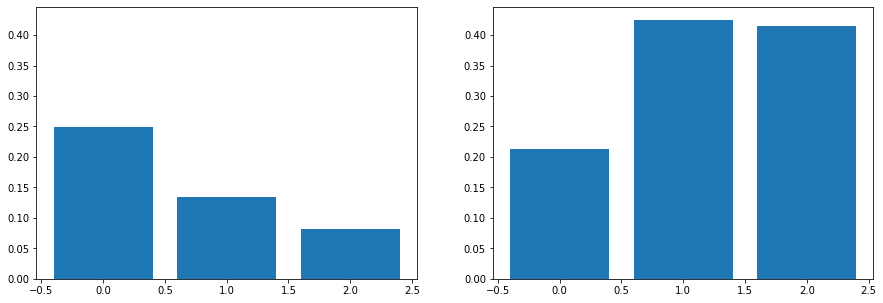

In [227]:
plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,2,1)
ax1.bar(gby_labels.index, gby_labels['pct_AAPI'])

ax2 = plt.subplot(1,2,2, sharey=ax1)
ax2.bar(gby_labels.index, gby_labels['pct_Hispanic'])

<BarContainer object of 3 artists>

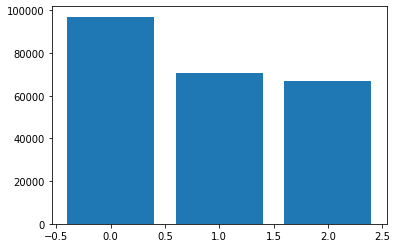

In [234]:
plt.bar(gby_labels.index, gby_labels['median_hh_income_2017'])

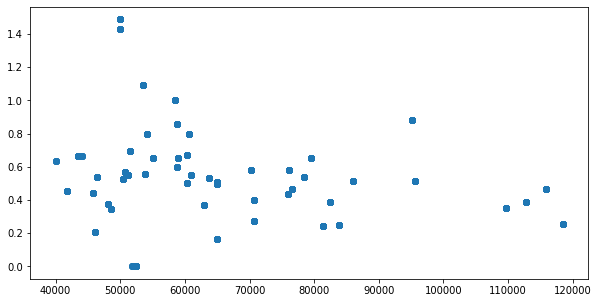

In [233]:
plt.figure(figsize=(10,5))
plt.scatter(demo_regression['median_hh_income_2017'], demo_regression['prosecution-rate'])